# Experiments

In this notebook we perform different ways to encode the concepts' features based on *Rank_PF*, *Disting*, and *Intercorr_str_tax*. 
This notebooks uses the SimLex-999 dataset... 

## Header

Libraries and additional programs

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import random
from scipy.stats.stats import pearsonr

%matplotlib inline

pathh = '../Data/' 
exp_file = '../Data/ExperimentalResults.xlsx'   

%run EncodingDataset.ipynb

## SimLex-999 dataset

_SimLex-999 is a gold standard resource for the evaluation of models that learn the meaning of words and concepts. 
SimLex-999 provides a way of measuring how well models capture similarity, rather than relatedness or association. The scores in SimLex-999 therefore differ from other well-known evaluation datasets such as WordSim-353. Example:_

**coast - shore**   9.000 (SimLex-999 rating)    9.1 (WordSim-353 rating)

**clothes - closet**  1.96 (SimLex-999 rating)   9.1 (WordSim-353 rating)

_More information: https://fh295.github.io/simlex.html_

Just as with the previous dataset, first we find out how many pairs are there for which both concepts appear in the McRae dataset. 

In [19]:
def ListConcepts():
    "Read an excel file and returns a list of pairs of concepts with its similarity value (according to humans)"
    SimLex_path = "../Data/SimLex-999.txt"
    SimLex_file = open(SimLex_path, "r")
    SimLex = SimLex_file.readlines()
    SimLex = [str.split(x) for x in SimLex][1:]   # Removed first line (column's names)

    # List of all concepts in McRae dataset
    Concepts = get_concepts_list() 
    
    #We are interested in the first elements of each line (row)
    SimLexList = []
    for row in SimLex:
        if row[0] in Concepts and row[1] in Concepts and row[2] == 'N':
            SimLexList.append([row[0], row[1], float(row[3])])
    
    return sorted(SimLexList, key = lambda x: x[2])
            
def ListNames (PairConcepts):
    "Given the list of pairs of concepts. It returns a list of the concept names without repetition"
    L = set([])
    for x in PairConcepts:
        L.add(x[0])
        L.add(x[1])
    return sorted(list(L))


SimLexList = ListConcepts()

SimLex_sim = [x[2] for x in SimLexList]
SimLex_names = ListNames(SimLexList)
print SimLexList

[['car', 'hose', 0.87], ['car', 'bridge', 0.95], ['car', 'elevator', 1.03], ['mouse', 'cat', 1.12], ['box', 'cigar', 1.25], ['box', 'elevator', 1.32], ['house', 'carpet', 1.38], ['chicken', 'rice', 1.43], ['ball', 'basket', 1.67], ['dog', 'cat', 1.75], ['house', 'key', 1.9], ['bread', 'cheese', 1.95], ['door', 'cellar', 1.97], ['spoon', 'cup', 2.02], ['boat', 'anchor', 2.25], ['boat', 'car', 2.37], ['cat', 'rabbit', 2.37], ['dog', 'horse', 2.38], ['ball', 'cannon', 2.58], ['cow', 'goat', 2.93], ['horse', 'ox', 3.02], ['bed', 'bedroom', 3.4], ['bed', 'couch', 3.42], ['bed', 'chair', 3.5], ['gun', 'knife', 3.65], ['guitar', 'drum', 3.78], ['apple', 'lemon', 4.05], ['house', 'barn', 4.33], ['wall', 'brick', 4.68], ['calf', 'bull', 4.93], ['cup', 'jar', 5.13], ['plate', 'bowl', 5.23], ['door', 'gate', 5.25], ['gun', 'cannon', 5.68], ['house', 'apartment', 5.8], ['cabin', 'hut', 6.53], ['chair', 'bench', 6.67], ['sofa', 'chair', 6.67], ['cat', 'lion', 6.75], ['sweater', 'jacket', 7.15], ['c

### a) Visualizing dataset

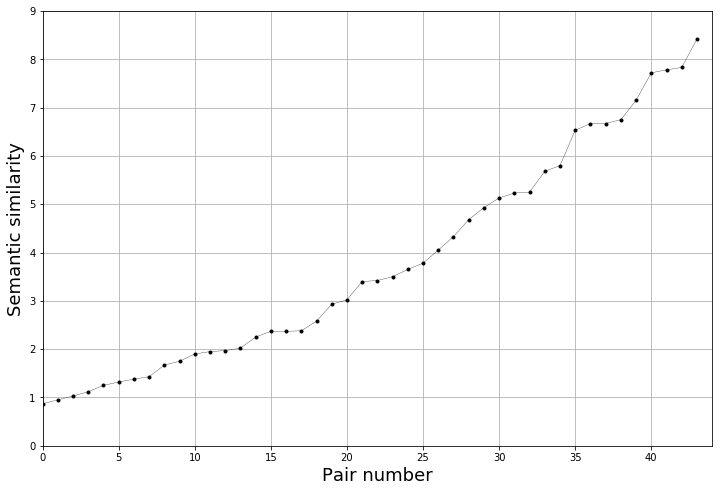

In [20]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot([x[2] for x in SimLexList], color='k', linestyle='-', marker='.', markersize=6, linewidth=.3 )  
plt.xlim((0,44))
plt.ylim((0,9))
plt.xlabel('Pair number', fontsize=18)
plt.ylabel('Semantic similarity', fontsize=18)
plt.grid(True)
plt.savefig('HumSim-SimLex.png', dpi=300)

### b) Encoding dataset

In [21]:
Init_mem('normal', 100, SimLex_names)

Begining to encode dataset...
End of encoding


### c) Measuring similarity

In [22]:
# Create list of distances for each method
HD_SimLex = []; McRae_SimLex = []; WUP_SimLex = []; LCH_SimLex = []; RES_SimLex = []; JCN_SimLex = []

# Loop over all pairs of concepts
i = 0
print "Starting..."
for pair in SimLexList:
    print i,
    HD_SimLex.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
    McRae_SimLex.append( McRae_simi(pair[0:2]) )
    WUP_SimLex.append(similarity_fun(wn.wup_similarity, pair[0:2]))
    LCH_SimLex.append(similarity_fun(wn.lch_similarity, pair[0:2]))
    RES_SimLex.append(similarity_fun(wn.res_similarity, pair[0:2], brown_ic))
    JCN_SimLex.append(similarity_fun(wn.jcn_similarity, pair[0:2], brown_ic))
    i += 1
print "End"

Starting...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 End


### d) Computing correlation

In [23]:
correlations = [['HDC', pearsonr(SimLex_sim, HD_SimLex)[0]], ['McRae', pearsonr(SimLex_sim, McRae_SimLex)[0]],
                ['wup', pearsonr(SimLex_sim, WUP_SimLex)[0]], ['lch', pearsonr(SimLex_sim, LCH_SimLex)[0]],
                ['res', pearsonr(SimLex_sim, RES_SimLex)[0]], ['jcn', pearsonr(SimLex_sim, JCN_SimLex)[0]]]

print sorted(correlations, key = lambda x : x[1], reverse = True)

[['HDC', 0.6641852006487601], ['McRae', 0.6249538446769186], ['res', 0.5148772163908228], ['lch', 0.43627661476892626], ['wup', 0.42406723211596103], ['jcn', 0.35782780233339617]]


### d) Plotting

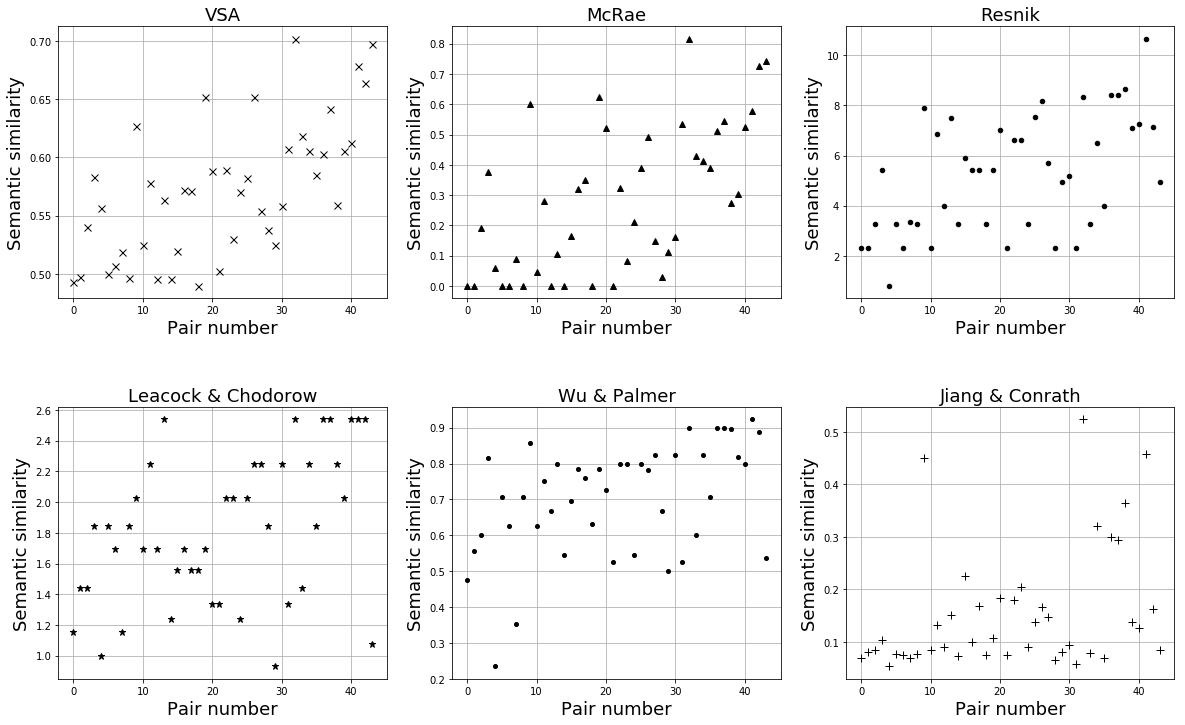

In [24]:
plt.rcParams["figure.figsize"] = [20,12]
f_size = 18
plt.subplots_adjust(hspace=0.4)

plt.subplot(231)
plt.plot(HD_SimLex, color='k', linestyle='None', marker='x', markersize=7, linewidth=1 )  
plt.title('VSA', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(232)
plt.plot(McRae_SimLex, color='k', linestyle='None', marker='^', markersize=6, linewidth=1 )  
plt.title('McRae', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)


plt.subplot(233)
plt.plot(RES_SimLex, color='k', linestyle='None', marker='.', markersize=9, linewidth=1 )  
plt.title('Resnik', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(234)
plt.plot(LCH_SimLex, color='k', linestyle='None', marker='*', markersize=7, linewidth=1 )  
plt.title('Leacock & Chodorow', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(235)
plt.plot(WUP_SimLex, color='k', linestyle='None', marker='.', markersize=8, linewidth=1 )  
plt.title('Wu & Palmer', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(236)
plt.plot(JCN_SimLex, color='k', linestyle='None', marker='+', markersize=8, linewidth=1 )  
plt.title('Jiang & Conrath', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.savefig('SubPlots-SimLex.png') #, dpi=1000)

## Testing weighted HDC representations

Here we find the correlation between the similarity values obtained from the HDC weighted representations and the dataset.

In [28]:
for mode in ['normal','Rank_PF','Disting','Intercorr_str', 'Intercorr-Rank']:
    for num_f in [6, 15, 20, 30]: #añadir más... 
        # Printing current mode:
        print "\n\nMode:", mode, "  Number of features:", num_f
        # Initialize memory
        Init_mem( mode, num_f, SimLex_names) 
        # Create list of distances
        HD_SimLex = []
        # Loop over all pairs of concepts
        i = 0
#        print "Starting..."
        for pair in SimLexList:
#            print i,
            HD_SimLex.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
            i += 1
#        print "\nDone!"
        
        correlation= pearsonr(SimLex_sim, HD_SimLex)[0]
        print "  Correlation value: ", correlation



Mode: normal   Number of features: 6
Begining to encode dataset...
End of encoding
  Correlation value:  0.5023444642619295


Mode: normal   Number of features: 15
Begining to encode dataset...
End of encoding
  Correlation value:  0.6370045539647677


Mode: normal   Number of features: 20
Begining to encode dataset...
End of encoding
  Correlation value:  0.6451268488228293


Mode: normal   Number of features: 30
Begining to encode dataset...
End of encoding
  Correlation value:  0.664540265952051


Mode: Rank_PF   Number of features: 6
Begining to encode dataset...
End of encoding
  Correlation value:  0.4960502572732524


Mode: Rank_PF   Number of features: 15
Begining to encode dataset...
End of encoding
  Correlation value:  0.5811192740033634


Mode: Rank_PF   Number of features: 20
Begining to encode dataset...
End of encoding
  Correlation value:  0.5610263422846753


Mode: Rank_PF   Number of features: 30
Begining to encode dataset...
End of encoding
  Correlation value:  0.

In [29]:
print SimLex_names
print Dict_defs[SimLex_names[0]]
L = []
for n in SimLex_names:
    L.append(len(Dict_defs[n]))

print L
print max(L), min(L), sum(L)/len(L)

['anchor', 'apartment', 'apple', 'ball', 'barn', 'basket', 'bed', 'bedroom', 'bench', 'boat', 'bottle', 'bowl', 'box', 'bread', 'brick', 'bridge', 'bull', 'cabin', 'calf', 'cannon', 'car', 'carpet', 'cat', 'cellar', 'chair', 'cheese', 'chicken', 'cigar', 'cottage', 'couch', 'cow', 'cup', 'dog', 'door', 'drum', 'elevator', 'gate', 'goat', 'guitar', 'gun', 'horse', 'hose', 'house', 'hut', 'jacket', 'jar', 'key', 'knife', 'lamb', 'lemon', 'lion', 'mouse', 'ox', 'plate', 'rabbit', 'rat', 'rice', 'sheep', 'sofa', 'spoon', 'sweater', 'wall']
[['adjective', 'heavy'], ['adjective', 'heavy'], ['adjective', 'heavy'], ['made_of', 'iron'], ['made_of', 'iron'], ['made_of', 'iron'], ['made_of', 'metal'], ['made_of', 'metal'], ['found_on', 'boats'], ['found_on', 'boats'], ['used_for', 'holding_boats_still'], ['action', 'sinks']]
[12, 12, 27, 12, 12, 12, 12, 12, 12, 12, 14, 22, 13, 12, 12, 12, 12, 12, 12, 13, 23, 12, 24, 12, 14, 12, 25, 12, 13, 23, 27, 26, 22, 12, 12, 12, 12, 25, 12, 25, 26, 12, 14, 1